1.1.	Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  
  
  
  The credit scoring model provides convenience to customers as they can provide required information, after which the model can assess whether they will get approval.
  This way, banks can give credit cards to customers based on their scores in order to avoid credit default and maximize the profit.

* In today’s era it becomes highly important for banks to use Artificial Intelligence as it can provide use cases such as chatbots for customer interaction, machine learning models for credit scores, fraud assessment, etc.
*   List item



1.2.	How is it going to impact the banking sector?
  
  A credit card predicting model can help the banks in minimizing risk as well as can enhance the customer experience.
  It can help the banks shortening the approval period which could lead to customers satisfaction.
  The reduced risk default and credit assessment could help the banks in maximizing their profits.

1.3.	If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.
  
  As technology is expanding day by day, it becomes important for all sectors to continuously keep updating their systems in order to survive the competition.
  As banks on the daily basis receives a large number of requests for credit cards that requires automation techniques such as proposed model to segregate the customers which can avoid risk and increase the customer base.


# Understanding the data

The dataset provided contains information about customers who have applied for credit cards and whether they have got approval or not.
Our aim is to create a machine larning model that can laern from the data and can classify a customer based on given features.

Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size


Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected.

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#importing the dataset
df = pd.read_csv('/content/Credit_card.csv')

In [ ]:
#first 5 records
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
#last 5 records
df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [ ]:
df.shape

(1548, 18)

The dataset contains 1548 rows and 18 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [ ]:
l1 = df.columns
l2 =[]
for i in l1:
  a = i[:].title()
  l2.append(a)
print(l2)

['Ind_Id', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children', 'Annual_Income', 'Type_Income', 'Education', 'Marital_Status', 'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone', 'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members']


The column names are in different format, therefore converting them into similar format

In [ ]:
df.columns = l2

In [ ]:
df.columns

Index(['Ind_Id', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [ ]:
#checking for duplicate records
df[df.duplicated()]

,Ind_Id,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Birthday_Count,Employed_Days,Mobile_Phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members


No duplicate records found.

In [ ]:
#checking for null values
df.isnull().sum()

Ind_Id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_Income       23
Type_Income          0
Education            0
Marital_Status       0
Housing_Type         0
Birthday_Count      22
Employed_Days        0
Mobile_Phone         0
Work_Phone           0
Phone                0
Email_Id             0
Type_Occupation    488
Family_Members       0
dtype: int64

There are near to 500 missing values in Type Occupation column, 22 in birthday count, 23 in annual income and 7 in gender column.

In [ ]:
df['Type_Occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [ ]:
df['Type_Occupation'] = df['Type_Occupation'].fillna('Not Specified')

Replacing missing value in gender column with user defined value.

In [ ]:
#Handling the missing values in Gender column
df['Gender'].value_counts()

F    973
M    568
Name: Gender, dtype: int64

In [ ]:
# As Gender is a column contains categorical values,
# therefore imputing mode for null values

df['Gender'] = df['Gender'].fillna(df['Gender'].mode().values[0])

In [ ]:

df['Gender'].isnull().sum()

0

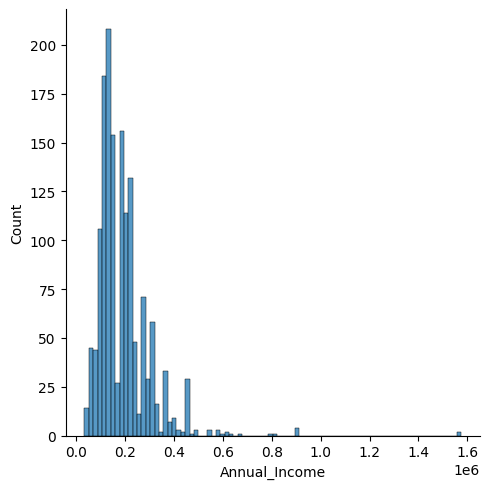

In [ ]:
sns.displot(x=df['Annual_Income'])

In [ ]:
# Handling the missing value of Annual income column by imputing mean

df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mean())

In [ ]:
#The birthday count column has the values in terms of days so converting them into years and storing in new column as age

df['Birthday_Count'].head(10)

0   -18772.0
1   -13557.0
2        NaN
3   -13557.0
4   -13557.0
5   -13557.0
6   -13557.0
7   -22134.0
8   -18173.0
9   -18173.0
Name: Birthday_Count, dtype: float64

In [ ]:
df['Age'] = round(-df['Birthday_Count']/365)

In [ ]:
df['Age'].head(10)

0    51.0
1    37.0
2     NaN
3    37.0
4    37.0
5    37.0
6    37.0
7    61.0
8    50.0
9    50.0
Name: Age, dtype: float64

In [ ]:
df['Age'].unique()

array([51., 37., nan, 61., 50., 52., 24., 46., 35., 33., 49., 44., 43.,
       60., 30., 55., 29., 36., 56., 58., 65., 53., 64., 42., 32., 26.,
       28., 45., 67., 25., 57., 59., 38., 31., 40., 34., 47., 41., 63.,
       54., 48., 62., 27., 39., 66., 23., 68., 22., 21.])

In [ ]:
#Handlling missing value in age column by imputing median

df['Age'] = df['Age'].fillna(round(df['Age'].median()))

In [ ]:
df.isnull().sum()

Ind_Id              0
Gender              0
Car_Owner           0
Propert_Owner       0
Children            0
Annual_Income       0
Type_Income         0
Education           0
Marital_Status      0
Housing_Type        0
Birthday_Count     22
Employed_Days       0
Mobile_Phone        0
Work_Phone          0
Phone               0
Email_Id            0
Type_Occupation     0
Family_Members      0
Age                 0
dtype: int64

In [ ]:
#we can categories a person being employed or not while applying
df['Employed_Status'] = df['Employed_Days'].apply(lambda x:1 if x < 0 else 0)

In [ ]:
df['Employed_Status'].head()

0    0
1    1
2    1
3    1
4    1
Name: Employed_Status, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_Id           1548 non-null   int64  
 1   Gender           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_Income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_Status   1548 non-null   object 
 9   Housing_Type     1548 non-null   object 
 10  Birthday_Count   1526 non-null   float64
 11  Employed_Days    1548 non-null   int64  
 12  Mobile_Phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_Id         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

<Axes: xlabel='Children'>

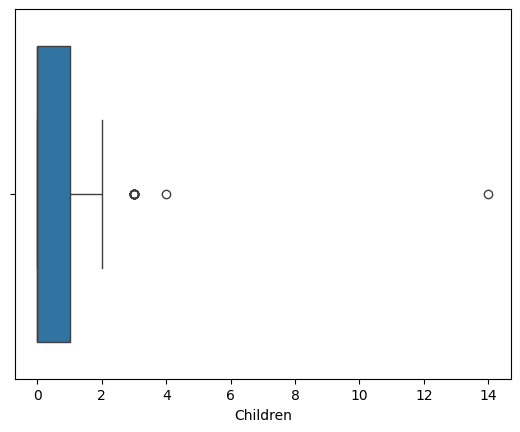

In [ ]:
sns.boxplot(x=df['Children'])

In [ ]:
df['Children'].unique()

array([ 0,  1,  2,  4,  3, 14])

In [ ]:
df['Children'].describe()

count    1548.000000
mean        0.412791
std         0.776691
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: Children, dtype: float64

In [ ]:
df['Children'] = df['Children'].clip(0, 2)

<Axes: xlabel='Children'>

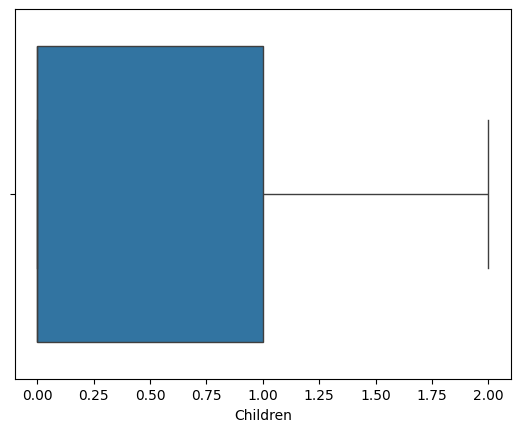

In [ ]:
sns.boxplot(x=df['Children'])

In [ ]:
df['Family_Members'].describe()

count    1548.000000
mean        2.161499
std         0.947772
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Family_Members, dtype: float64

In [ ]:
# q1 = 0.0 , q3 = 1.0
# IQR = 1.0
lower_limit = round(2 - (1.5*1))
print(lower_limit)
upper_limit = round(3 + (1.5*1))
print(upper_limit)

0
4


In [ ]:
df['Family_Members'] = df['Family_Members'].clip(lower_limit, upper_limit)

<Axes: ylabel='Family_Members'>

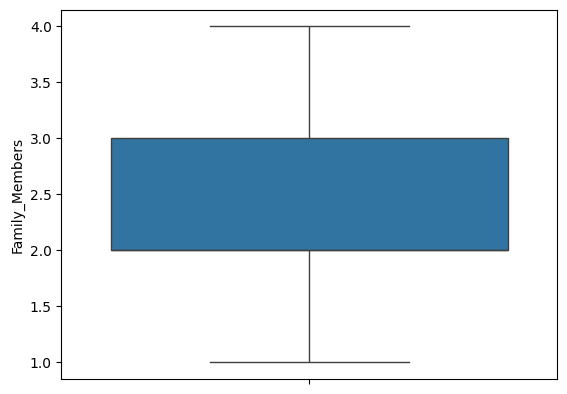

In [ ]:

sns.boxplot(y=df['Family_Members'])

The Children and Family column contains outliers, therefore treating them with IQR method.

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_Id           1548 non-null   int64  
 1   Gender           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_Income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_Status   1548 non-null   object 
 9   Housing_Type     1548 non-null   object 
 10  Birthday_Count   1526 non-null   float64
 11  Employed_Days    1548 non-null   int64  
 12  Mobile_Phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_Id         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

<Axes: xlabel='Family_Members', ylabel='Count'>

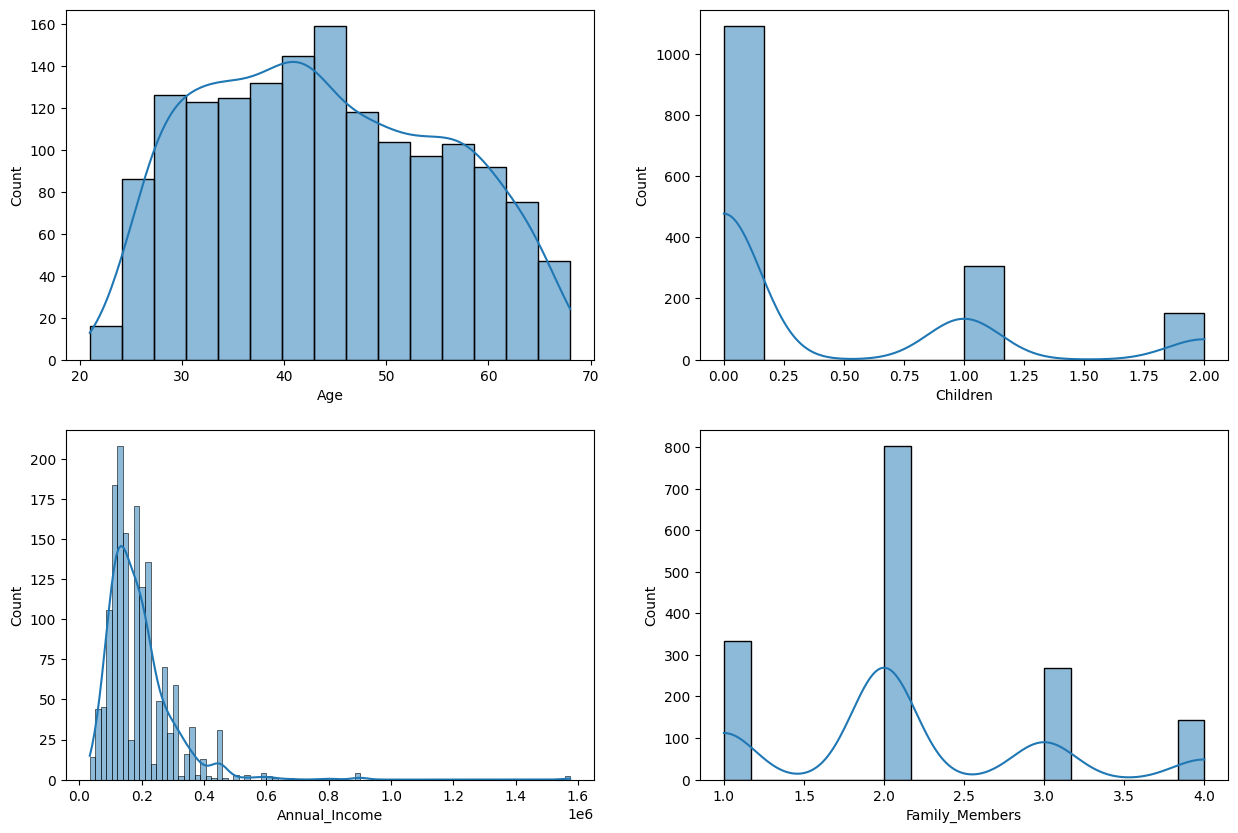

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['Age'], kde=True)

plt.subplot(2,2,2)
sns.histplot(x=df['Children'], kde=True)

plt.subplot(2,2,3)
sns.histplot(x=df['Annual_Income'], kde=True)

plt.subplot(2,2,4)
sns.histplot(x=df['Family_Members'], kde=True)

The age of Customers is distributed between 20 years and 70 years.

Majority of the cutomers applying are aged between 40 and 50.

The data in Annual income is right skewed.

<Axes: xlabel='Housing_Type', ylabel='count'>

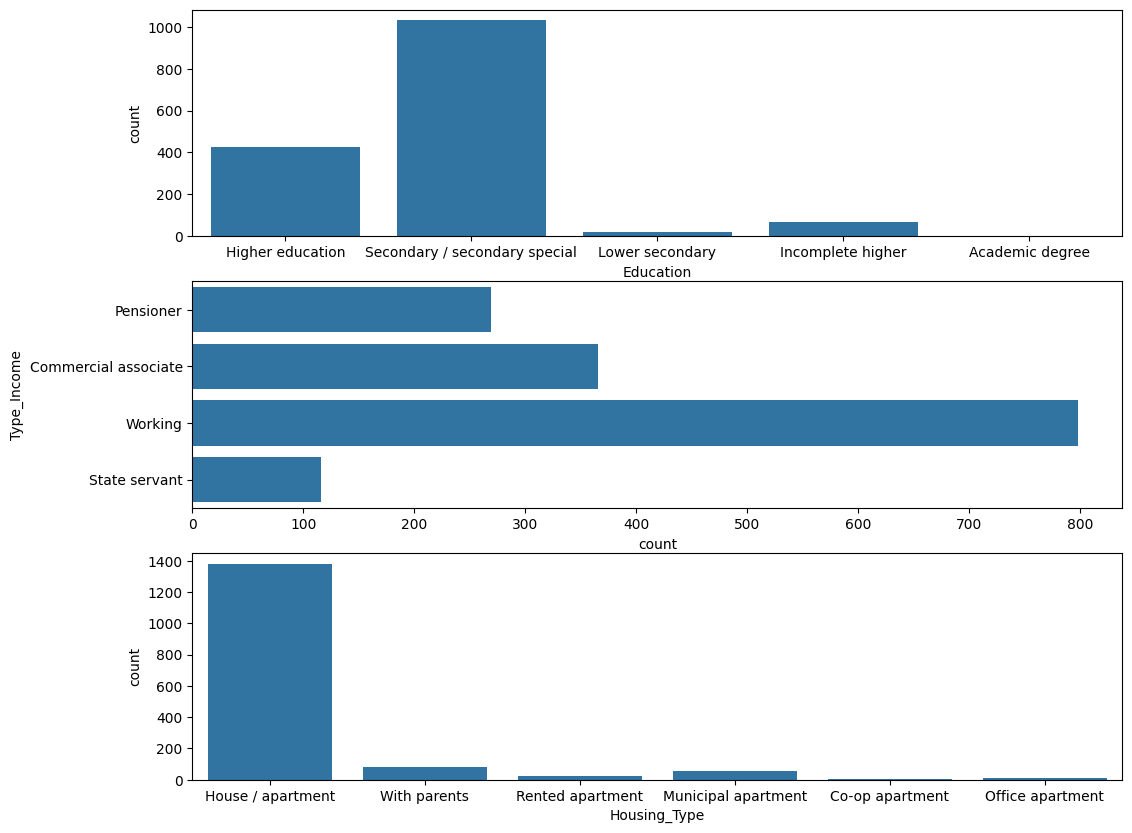

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.countplot(x=df['Education'])

plt.subplot(3,1,2)
sns.countplot(y=df['Type_Income'])

plt.subplot(3,1,3)
sns.countplot(x=df['Housing_Type'])

Majority of customers are living in houses or apartments.

Around 800 customers have shown their type of income as working class.

Most of the customers has completed their education upto Secondary or secondary special level.

<Axes: xlabel='Propert_Owner', ylabel='count'>

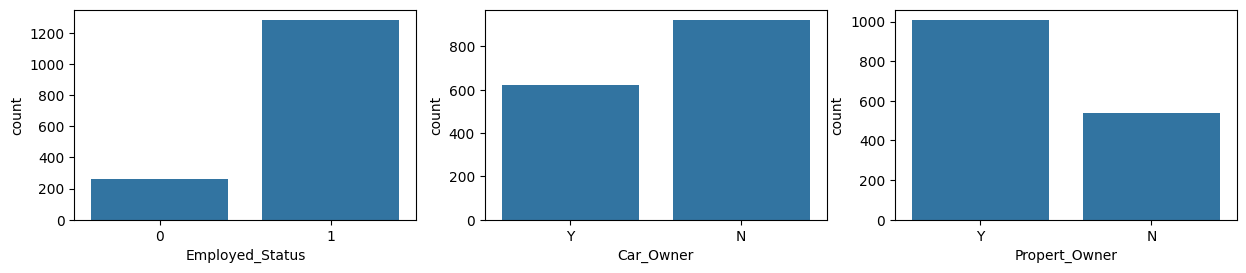

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
sns.countplot(x=df['Employed_Status'])

plt.subplot(2,3,2)
sns.countplot(x=df['Car_Owner'])

plt.subplot(2,3,3)
sns.countplot(x=df['Propert_Owner'])

Nearly 200 people are not employed.

Majority of customers do not own cars.

Customers owning property are more.

<Axes: xlabel='Housing_Type', ylabel='Annual_Income'>

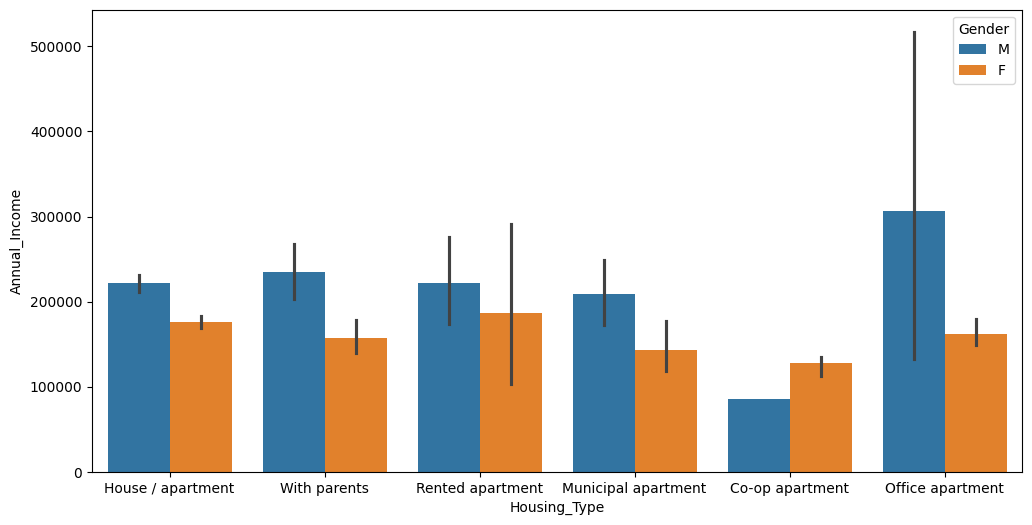

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Housing_Type'], y=df['Annual_Income'], hue=df['Gender'], errorbar=None)

<Axes: xlabel='Education', ylabel='Annual_Income'>

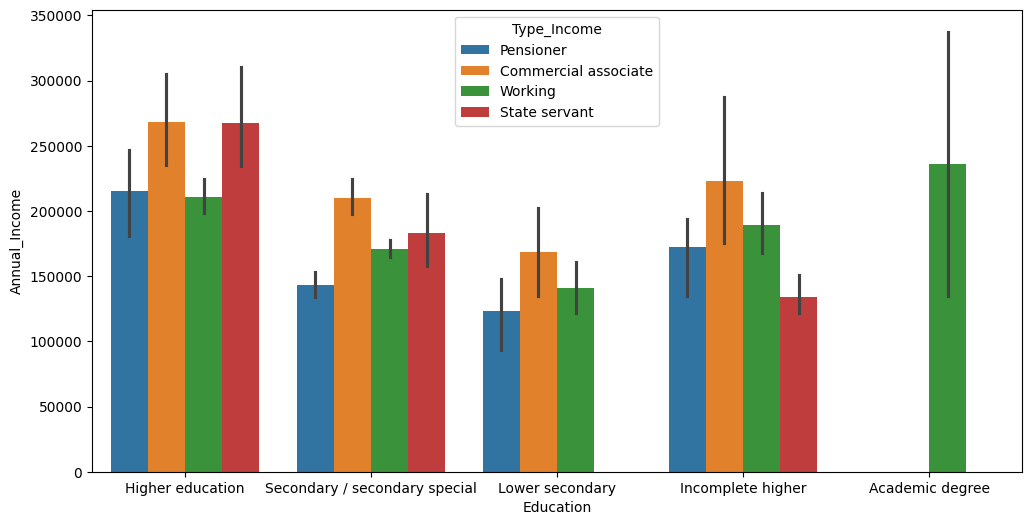

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Education'], y=df['Annual_Income'], hue=df['Type_Income'],errorbar=None)

Importing the target dataset.

In [ ]:
t = pd.read_csv('/content/Credit_card_label.csv')

In [ ]:
t.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
t.columns = ['Ind_Id', 'Label']

Merging the main and target dataset.

In [ ]:
df = pd.merge(df, t, on=['Ind_Id'])

In [ ]:
df.head()

,Ind_Id,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,...,Employed_Days,Mobile_Phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Age,Employed_Status,Label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,Not Specified,2,51.0,0,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Not Specified,2,37.0,1,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Not Specified,2,43.0,1,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Not Specified,2,37.0,1,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Not Specified,2,37.0,1,1


<Axes: xlabel='Housing_Type'>

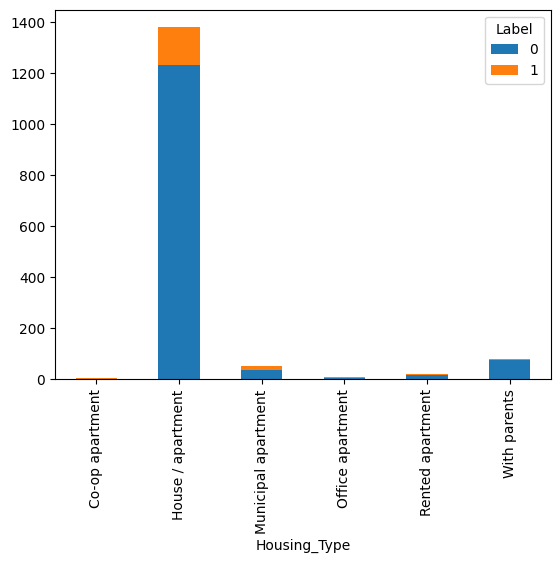

In [ ]:
df.groupby(['Housing_Type', 'Label']).Housing_Type.count().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Type_Income'>

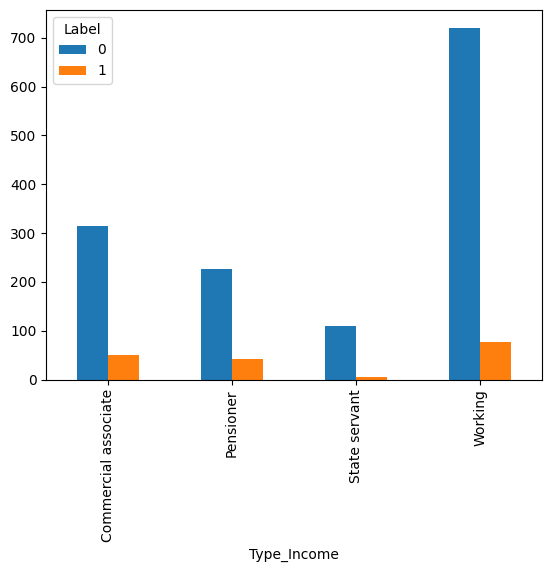

In [ ]:
df.groupby(['Type_Income', 'Label']).Type_Income.count().unstack().plot(kind='bar')

<Axes: xlabel='Education'>

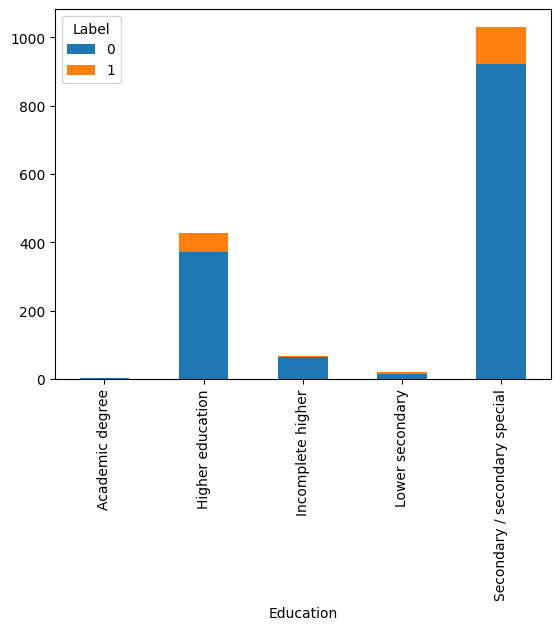

In [ ]:
df.groupby(['Education', 'Label']).Education.count().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Marital_Status'>

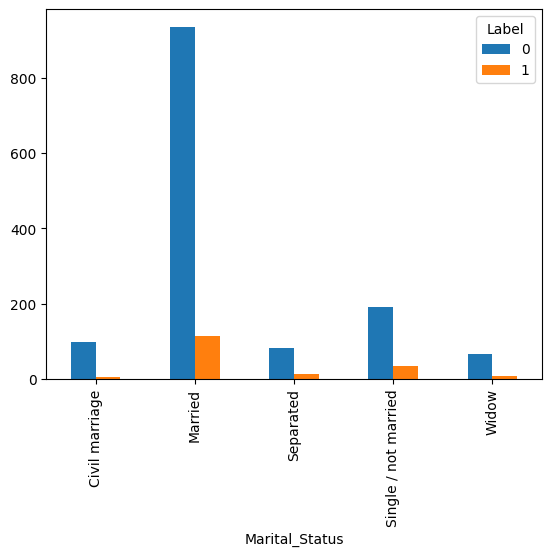

In [ ]:

df.groupby(['Marital_Status', 'Label']).Marital_Status.count().unstack().plot(kind='bar')

<Axes: xlabel='Car_Owner'>

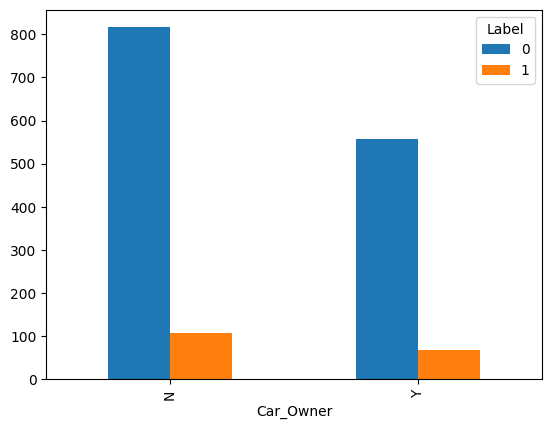

In [ ]:

df.groupby(['Car_Owner', 'Label']).Car_Owner.count().unstack().plot(kind='bar')

In [ ]:
#dropping unnecessary columns
df = df.drop(columns=['Ind_Id', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone', 'Work_Phone', 'Phone', 'Email_Id'])

Converting categorical data

In [ ]:
df['Education'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [ ]:
edu = {
    'Lower secondary': 0,
    'Secondary / secondary special' : 1,
    'Incomplete higher' : 2,
    'Higher education' : 3,
    'Academic degree' : 4
}

In [ ]:
df['Education'] = df['Education'].map(edu)

In [ ]:
df['Education'].isnull().sum()

0

In [ ]:
df = pd.get_dummies(df, columns = ['Gender', 'Car_Owner', 'Propert_Owner', 'Type_Occupation', 'Type_Income', 'Marital_Status', 'Housing_Type'], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Children                               1548 non-null   int64  
 1   Annual_Income                          1548 non-null   float64
 2   Education                              1548 non-null   int64  
 3   Family_Members                         1548 non-null   int64  
 4   Age                                    1548 non-null   float64
 5   Employed_Status                        1548 non-null   int64  
 6   Label                                  1548 non-null   int64  
 7   Gender_M                               1548 non-null   uint8  
 8   Car_Owner_Y                            1548 non-null   uint8  
 9   Propert_Owner_Y                        1548 non-null   uint8  
 10  Type_Occupation_Cleaning staff         1548 non-null   uint8  
 11  Type

##Hypothesis Testing
NH - Average income of customers applying for credit card is 150000

AH - Average income of customers applying for credit card is higher than 150000

In [ ]:
import scipy.stats as stats

In [ ]:
t_stats, p_value = stats.ttest_1samp(df['Annual_Income'], 150000)
print(t_stats)
print(p_value)

14.49044485813038
1.0264734849275868e-44


In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [ ]:
#We can reject our hypothesis
df['Annual_Income'].mean()

191399.32622950824

NH - Average age of customers applying is 30

AH - Average age is not 30

In [ ]:
t_stats, p_value = stats.ttest_1samp(df['Age'], 30)
print(t_stats)
print(p_value)

if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

47.6029404222574
2.383969839575231e-305
Reject the null hypothesis.


##Feature Selection

In [ ]:
#To check important categorical features we can use chi square test
from sklearn.feature_selection import chi2
X = df.loc[:, ['Education','Gender_M', 'Car_Owner_Y',
       'Propert_Owner_Y', 'Type_Occupation_Cleaning staff',
       'Type_Occupation_Cooking staff', 'Type_Occupation_Core staff',
       'Type_Occupation_Drivers', 'Type_Occupation_HR staff',
       'Type_Occupation_High skill tech staff', 'Type_Occupation_IT staff',
       'Type_Occupation_Laborers', 'Type_Occupation_Low-skill Laborers',
       'Type_Occupation_Managers', 'Type_Occupation_Medicine staff',
       'Type_Occupation_Not Specified',
       'Type_Occupation_Private service staff',
       'Type_Occupation_Realty agents', 'Type_Occupation_Sales staff',
       'Type_Occupation_Secretaries', 'Type_Occupation_Security staff',
       'Type_Occupation_Waiters/barmen staff', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'Marital_Status_Married', 'Marital_Status_Separated',
       'Marital_Status_Single / not married', 'Marital_Status_Widow',
       'Housing_Type_House / apartment', 'Housing_Type_Municipal apartment',
       'Housing_Type_Office apartment', 'Housing_Type_Rented apartment',
       'Housing_Type_With parents']]

y = df['Label']

In [ ]:
chi_scores = chi2(X, y)

In [ ]:
chi_scores

(array([1.81995990e-01, 2.04350649e+00, 2.00586507e-01, 1.72495830e-01,
        1.07550250e-01, 1.25556312e+00, 6.35376275e-01, 6.04890230e-02,
        3.82374363e-01, 1.86018264e-02, 1.56914286e+01, 1.96372254e-01,
        1.06981167e+00, 1.38578467e-01, 1.40332835e+00, 6.85936708e-02,
        2.16678806e+00, 2.54916242e-01, 1.17545981e+00, 1.14712309e+00,
        1.06784444e+01, 3.77008844e-01, 4.98003536e+00, 4.35076704e+00,
        2.18195116e+00, 2.00170261e-01, 1.02904588e+00, 3.83090823e+00,
        3.04695869e-02, 7.23814542e-01, 1.88489250e+01, 1.06981167e+00,
        1.25556312e+00, 2.03868484e+00]),
 array([6.69663500e-01, 1.52856935e-01, 6.54247850e-01, 6.77903143e-01,
        7.42950566e-01, 2.62492605e-01, 4.25390091e-01, 8.05724683e-01,
        5.36335249e-01, 8.91514154e-01, 7.45612961e-05, 6.57665132e-01,
        3.00987988e-01, 7.09698318e-01, 2.36167090e-01, 7.93395506e-01,
        1.41020506e-01, 6.13634478e-01, 2.78282229e-01, 2.84152199e-01,
        1.08391170e-03

<Axes: >

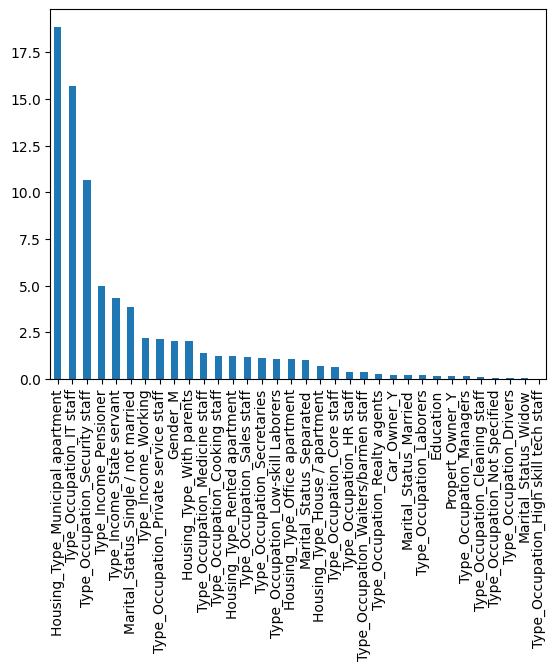

In [ ]:
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

Here we can observe the number of categorical which are highly important for our model

<Axes: >

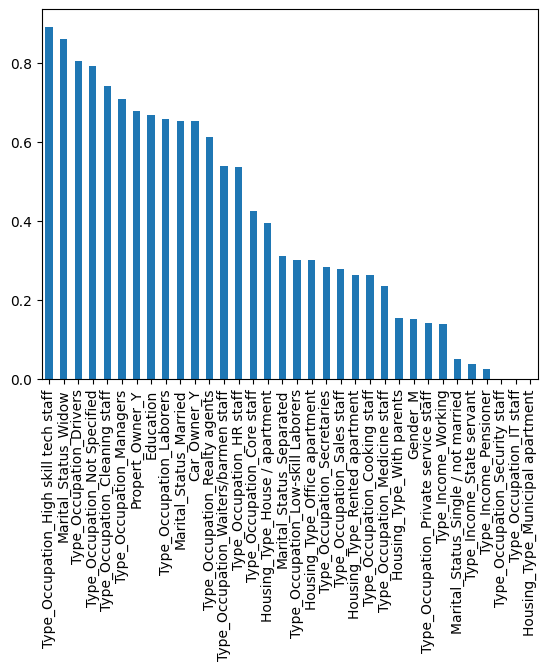

In [ ]:
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

With p-value we can observe features which are less important

<Axes: >

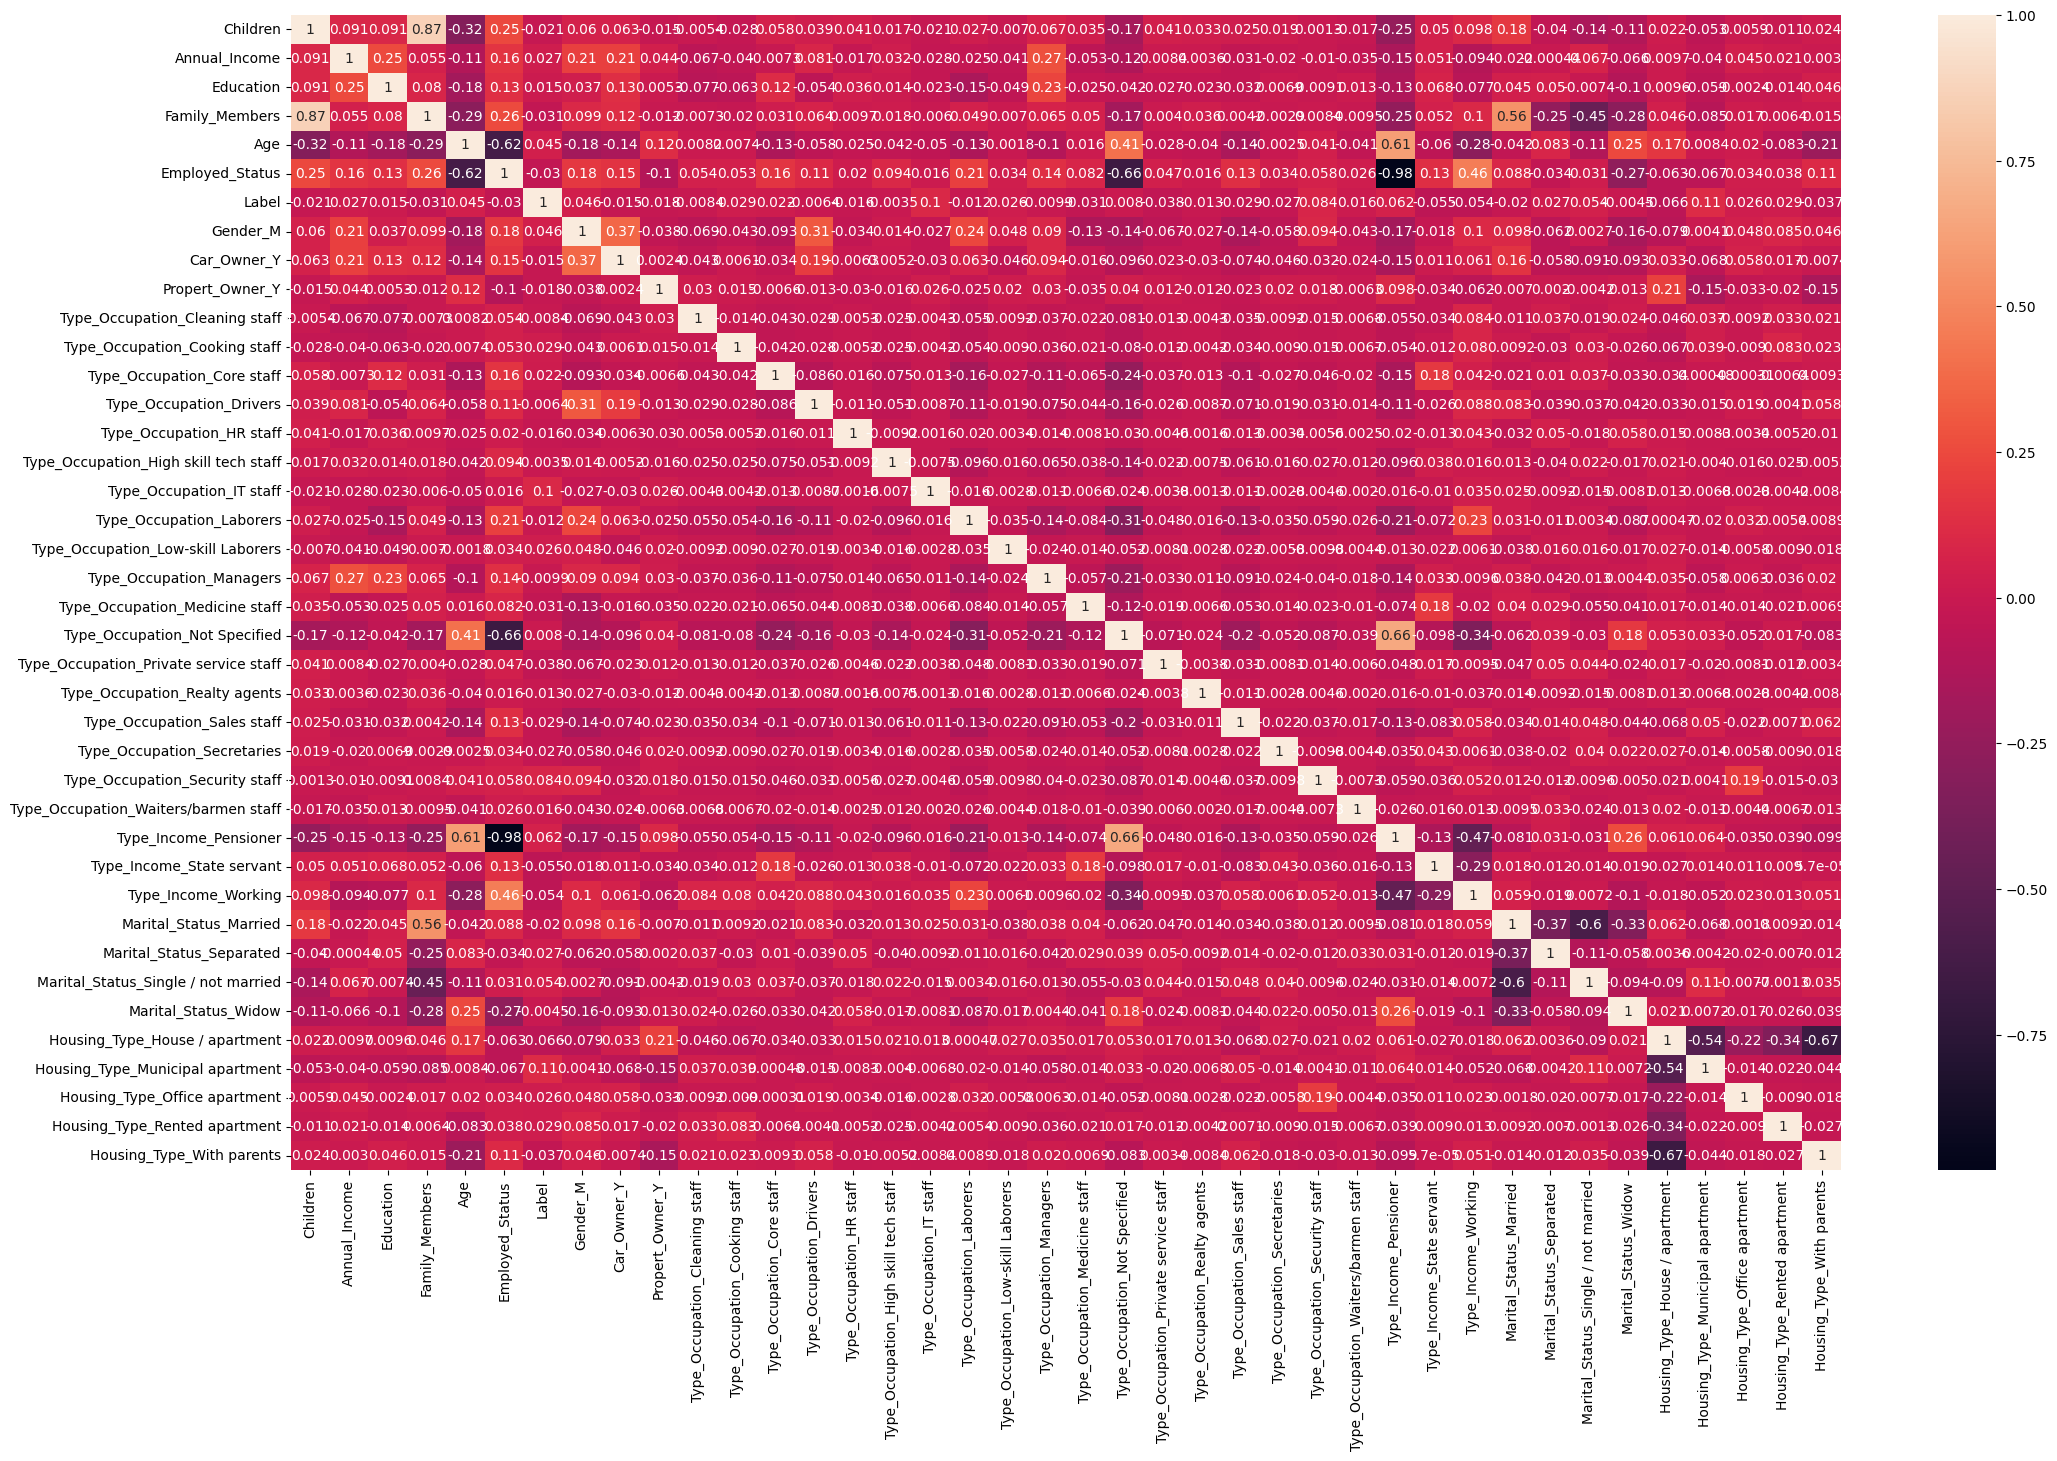

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.corr(method = 'pearson')['Label']

Children                                -0.021178
Annual_Income                            0.026875
Education                                0.014999
Family_Members                          -0.031051
Age                                      0.044925
Employed_Status                         -0.029937
Label                                    1.000000
Gender_M                                 0.045664
Car_Owner_Y                             -0.014734
Propert_Owner_Y                         -0.017906
Type_Occupation_Cleaning staff          -0.008395
Type_Occupation_Cooking staff            0.028675
Type_Occupation_Core staff               0.021504
Type_Occupation_Drivers                 -0.006432
Type_Occupation_HR staff                -0.015732
Type_Occupation_High skill tech staff   -0.003542
Type_Occupation_IT staff                 0.100746
Type_Occupation_Laborers                -0.012386
Type_Occupation_Low-skill Laborers       0.026365
Type_Occupation_Managers                -0.009907


In [ ]:
df.var()

Children                                 4.353024e-01
Annual_Income                            1.263555e+10
Education                                8.286452e-01
Family_Members                           7.408939e-01
Age                                      1.327345e+02
Employed_Status                          1.402677e-01
Label                                    1.003338e-01
Gender_M                                 2.324412e-01
Car_Owner_Y                              2.407661e-01
Propert_Owner_Y                          2.269041e-01
Type_Occupation_Cleaning staff           1.401896e-02
Type_Occupation_Cooking staff            1.339051e-02
Type_Occupation_Core staff               9.983314e-02
Type_Occupation_Drivers                  5.250305e-02
Type_Occupation_HR staff                 1.935479e-03
Type_Occupation_High skill tech staff    4.025254e-02
Type_Occupation_IT staff                 1.291155e-03
Type_Occupation_Laborers                 1.432463e-01
Type_Occupation_Low-skill La

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Children                               1548 non-null   int64  
 1   Annual_Income                          1548 non-null   float64
 2   Education                              1548 non-null   int64  
 3   Family_Members                         1548 non-null   int64  
 4   Age                                    1548 non-null   float64
 5   Employed_Status                        1548 non-null   int64  
 6   Label                                  1548 non-null   int64  
 7   Gender_M                               1548 non-null   uint8  
 8   Car_Owner_Y                            1548 non-null   uint8  
 9   Propert_Owner_Y                        1548 non-null   uint8  
 10  Type_Occupation_Cleaning staff         1548 non-null   uint8  
 11  Type

In [ ]:
X = df.drop(columns = ['Label'])
y = df['Label']

The target column has highly imbalance data, which can lead to bias and wrong prediction, and also can affect the accuracy of our model.
Therefore using oversampling technique.

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_balanced, y_balanced = oversample.fit_resample(X, y)

In [ ]:
y_balanced.value_counts()

1    1373
0    1373
Name: Label, dtype: int64

Selecting important features by Recursive Feature Elimination method to avoid overfitting.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(DecisionTreeClassifier())

In [ ]:
rfe.fit(X_balanced, y_balanced)

RFE(estimator=DecisionTreeClassifier())

In [ ]:
c = rfe.get_feature_names_out()
print(c)

['Annual_Income' 'Education' 'Family_Members' 'Age' 'Car_Owner_Y'
 'Propert_Owner_Y' 'Type_Occupation_Core staff' 'Type_Occupation_Drivers'
 'Type_Occupation_Laborers' 'Type_Occupation_Managers'
 'Type_Occupation_Not Specified' 'Type_Occupation_Sales staff'
 'Type_Income_State servant' 'Type_Income_Working'
 'Marital_Status_Married' 'Marital_Status_Separated'
 'Marital_Status_Single / not married' 'Housing_Type_House / apartment'
 'Housing_Type_With parents']


In [ ]:
rfe.ranking_

array([12,  1,  1,  1,  1, 20,  3,  1,  1,  8, 13,  1,  1, 18,  2, 19,  1,
       16,  1, 11,  1,  5, 15,  1, 21, 10, 17,  6,  1,  1,  1,  1,  1,  7,
        1,  4, 14,  9,  1])

In [ ]:
c.shape

(19,)

#Model building

This is a classification based problem, so we can select Logistic Regression, Decisiion Tree, Random Forest, XGBoost, Adaboost, Support Vector Classifier.

NH - XGBoost will perform better than all other ml models.

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X_balanced.loc[:, c])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_scaled, y_balanced, test_size=0.2, random_state=0)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred1 = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)

0.7454545454545455

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[210  66]
 [ 74 200]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       276
           1       0.75      0.73      0.74       274

    accuracy                           0.75       550
   macro avg       0.75      0.75      0.75       550
weighted avg       0.75      0.75      0.75       550



##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_test, y_test)

0.8745454545454545

In [ ]:

y_pred2 = dt.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[229  47]
 [ 22 252]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       276
           1       0.84      0.92      0.88       274

    accuracy                           0.87       550
   macro avg       0.88      0.87      0.87       550
weighted avg       0.88      0.87      0.87       550



##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc.score(X_test, y_test)

0.9327272727272727

In [ ]:
y_pred3 = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[252  24]
 [ 13 261]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       276
           1       0.92      0.95      0.93       274

    accuracy                           0.93       550
   macro avg       0.93      0.93      0.93       550
weighted avg       0.93      0.93      0.93       550



##XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb.score(X_test, y_test)

0.9418181818181818

In [ ]:
y_pred4 = xgb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[253  23]
 [  9 265]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       276
           1       0.92      0.97      0.94       274

    accuracy                           0.94       550
   macro avg       0.94      0.94      0.94       550
weighted avg       0.94      0.94      0.94       550



##Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
svc.score(X_test, y_test)

0.8236363636363636

In [ ]:
y_pred5 = svc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

[[223  53]
 [ 44 230]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       276
           1       0.81      0.84      0.83       274

    accuracy                           0.82       550
   macro avg       0.82      0.82      0.82       550
weighted avg       0.82      0.82      0.82       550



##AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
adb.score(X_test, y_test)

0.7563636363636363

In [ ]:
y_pred6 = adb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

[[208  68]
 [ 66 208]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       276
           1       0.75      0.76      0.76       274

    accuracy                           0.76       550
   macro avg       0.76      0.76      0.76       550
weighted avg       0.76      0.76      0.76       550



## Hyperparameter tuning

In [ ]:
param_grid = {
    'max_depth' : [3, 5, 10, None],
    'n_estimators' : [10, 100, 200],
    'max_features' : [1, 3, 5, 7],
    'min_samples_leaf' : [1, 2, 3],
    'min_samples_split' : [1, 2, 3],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(rfc, param_grid=param_grid, scoring='roc_auc', verbose=3, cv=5, n_jobs=-2)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 100, 200]},
             scoring='roc_auc', verbose=3)

In [ ]:
clf.score(X_test, y_test)

0.9673053527980535

In [ ]:
clf.best_estimator_

RandomForestClassifier(max_features=1, n_estimators=200)

In [ ]:
clf.best_score_

0.9758015585493794

In [ ]:
clf.best_params_

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rfc_tuned = RandomForestClassifier(max_features=1, min_samples_leaf = 1, min_samples_split=4, n_estimators=120, random_state=0)

In [ ]:
rfc_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=1, min_samples_split=4, n_estimators=120,
                       random_state=0)

In [ ]:
rfc_tuned.score(X_test, y_test)

0.9436363636363636

In [ ]:
y_pred_tuned = rfc_tuned.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

[[260  16]
 [ 15 259]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       276
           1       0.94      0.95      0.94       274

    accuracy                           0.94       550
   macro avg       0.94      0.94      0.94       550
weighted avg       0.94      0.94      0.94       550



#Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

result = {
    'Model' : ['Logistic_Reg', 'Decision_tree', 'Random_forest', 'XGB', 'SVC', 'Adaboost', 'Random_forest_tuned'],

    'Accuracy' : [accuracy_score(y_test, y_pred1),  accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3),
                  accuracy_score(y_test, y_pred4), accuracy_score(y_test, y_pred5), accuracy_score(y_test, y_pred6),
                  accuracy_score(y_test, y_pred_tuned)],

    'Precision' : [precision_score(y_test, y_pred1), precision_score(y_test, y_pred2), precision_score(y_test, y_pred3),
                   precision_score(y_test, y_pred4), precision_score(y_test, y_pred5), precision_score(y_test, y_pred6),
                   precision_score(y_test, y_pred_tuned)],

    'Recall' : [recall_score(y_test, y_pred1), recall_score(y_test, y_pred2), recall_score(y_test, y_pred3),
                recall_score(y_test, y_pred4), recall_score(y_test, y_pred5), recall_score(y_test, y_pred6),
                recall_score(y_test, y_pred_tuned)],

    'F1_score' : [f1_score(y_test, y_pred1), f1_score(y_test, y_pred2), f1_score(y_test, y_pred3),
                  f1_score(y_test, y_pred4), f1_score(y_test, y_pred5), f1_score(y_test, y_pred6),
                  f1_score(y_test, y_pred_tuned)]
}

In [ ]:
res = pd.DataFrame(result)
res

,Model,Accuracy,Precision,Recall,F1_score
0,Logistic_Reg,0.745455,0.751880,0.729927,0.740741
1,Decision_tree,0.874545,0.842809,0.919708,0.879581
2,Random_forest,0.932727,0.915789,0.952555,0.933810
3,XGB,0.941818,0.920139,0.967153,0.943060
4,SVC,0.823636,0.812721,0.839416,0.825853
5,Adaboost,0.756364,0.753623,0.759124,0.756364
6,Random_forest_tuned,0.943636,0.941818,0.945255,0.943534


We can observe that amongst all the models XGBoost performed well, but after hyperparameter tuning Random Forest outrun XGBoost in terms of precision metrics.

<Axes: >

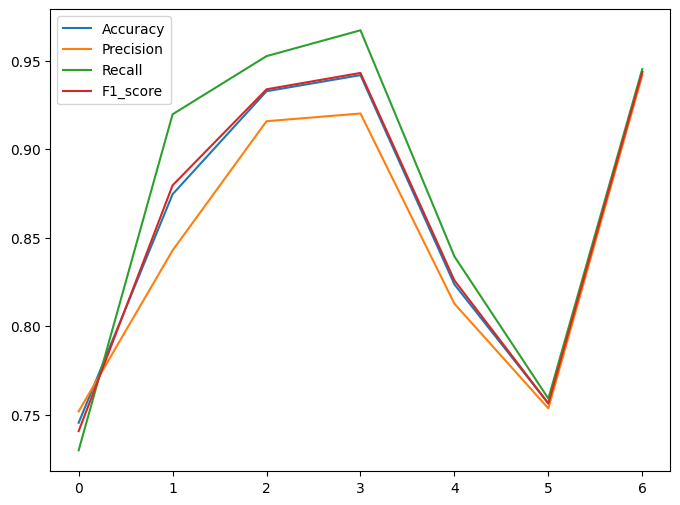

In [ ]:
res.plot(figsize=(8,6))

# SQL

In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('df',df)

1. Group the customers based on their income type and find the average of their annual income.

In [ ]:
conn.execute("SELECT Type_Income, AVG(Annual_Income) FROM df GROUP BY Type_Income").fetchdf()

,Type_Income,avg(Annual_Income)
0,Pensioner,155713.746487
1,Working,181191.434321
2,State servant,211422.413793
3,Commercial associate,233653.135917


2. Find the female owners of cars and property.

In [ ]:
conn.execute("SELECT * FROM df WHERE Car_Owner = 'Y'").fetch_df()

,Ind_Id,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,...,Employed_Days,Mobile_Phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Age,Employed_Status,Label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,Not Specified,2,51.0,0,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Not Specified,2,37.0,1,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Not Specified,2,43.0,1,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Not Specified,2,37.0,1,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Not Specified,2,37.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,5024049,F,Y,Y,1,144000.00000,Working,Higher education,Married,House / apartment,...,-2924,1,0,0,0,Accountants,3,35.0,1,0
620,5118268,M,Y,N,1,360000.00000,State servant,Secondary / secondary special,Married,House / apartment,...,-3536,1,0,1,0,Drivers,3,31.0,1,0
621,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,...,-2477,1,0,0,0,Managers,4,36.0,1,0
622,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,...,-645,1,1,1,0,Drivers,2,42.0,1,0


In [ ]:
conn.execute("SELECT * FROM df WHERE Gender = 'F' AND (Car_Owner = 'Y') AND (Propert_Owner = 'Y')").fetchdf()

,Ind_Id,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,...,Employed_Days,Mobile_Phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Age,Employed_Status,Label
0,5018498,F,Y,Y,0,90000.00000,Working,Secondary / secondary special,Married,House / apartment,...,-1002,1,1,1,0,Cooking staff,2,52.0,1,1
1,5018501,F,Y,Y,0,191399.32623,Working,Secondary / secondary special,Married,House / apartment,...,-1002,1,1,1,0,Cooking staff,2,52.0,1,1
2,5018503,F,Y,Y,0,90000.00000,Working,Secondary / secondary special,Married,House / apartment,...,-1002,1,1,1,0,Cooking staff,2,52.0,1,1
3,5024213,F,Y,Y,0,540000.00000,Commercial associate,Higher education,Married,House / apartment,...,-185,1,0,1,0,Not Specified,2,43.0,1,1
4,5036660,F,Y,Y,0,76500.00000,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,Not Specified,2,65.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,5048458,F,Y,Y,1,126000.00000,Working,Higher education,Married,House / apartment,...,-157,1,0,0,0,Not Specified,3,26.0,1,0
175,5023719,F,Y,Y,0,175500.00000,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,1,0,Not Specified,2,60.0,0,0
176,5033520,F,Y,Y,2,180000.00000,Working,Secondary / secondary special,Married,Municipal apartment,...,-5862,1,0,1,0,Medicine staff,4,34.0,1,0
177,5024049,F,Y,Y,1,144000.00000,Working,Higher education,Married,House / apartment,...,-2924,1,0,0,0,Accountants,3,35.0,1,0


3. Find the male customers who are staying with their families.

In [ ]:
conn.execute("SELECT * FROM df WHERE Gender = 'M' AND Family_Members > 1").fetchdf()

,Ind_Id,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,...,Employed_Days,Mobile_Phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Age,Employed_Status,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,Not Specified,2,51.0,0,1
1,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-678,1,0,1,1,Core staff,3,50.0,1,1
2,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,-678,1,0,1,1,Core staff,3,50.0,1,1
3,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,...,-913,1,0,0,1,Not Specified,3,24.0,1,1
4,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,-248,1,0,0,0,Laborers,2,46.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,5096856,M,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-3476,1,0,0,0,Drivers,2,49.0,1,0
466,5090942,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-1436,1,0,0,0,Low-skill Laborers,2,37.0,1,0
467,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,...,-3536,1,0,1,0,Drivers,3,31.0,1,0
468,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,...,-2477,1,0,0,0,Managers,4,36.0,1,0


4. Please list the top five people having the highest income.

In [ ]:
conn.execute("SELECT * FROM df ORDER BY Annual_Income DESC LIMIT 5").fetchdf()

,Ind_Id,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,...,Employed_Days,Mobile_Phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Age,Employed_Status,Label
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-2479,1,0,0,0,Managers,2,28.0,1,0
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-2479,1,0,0,0,Managers,2,28.0,1,0
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,...,-4509,1,0,0,0,Laborers,3,42.0,1,0
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,...,-1000,1,0,0,0,Managers,4,27.0,1,0
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,...,-1000,1,0,0,0,Managers,4,27.0,1,0


5. How many married people are having bad credit?

In [ ]:
conn.execute("SELECT COUNT(*) FROM df WHERE Marital_Status = 'Married' AND Label = 1").fetchdf()

,count_star()
0,114


6. What is the highest Education level and what is the total count?

In [ ]:
conn.execute("SELECT Education, COUNT(*) as col1 FROM df GROUP BY Education ORDER BY col1 DESC").fetchdf()

,Education,col1
0,Secondary / secondary special,1031
1,Higher education,426
2,Incomplete higher,68
3,Lower secondary,21
4,Academic degree,2


7. Between married males and females, who is having more bad credit?

In [ ]:
conn.execute("SELECT COUNT(*) as col1, Gender FROM df WHERE Label = 0 GROUP BY Gender ORDER BY col1 DESC LIMIT 1").fetchdf()

,col1,Gender
0,880,F
